In [ ]:
# grabbed from https://www.kaggle.com/donyoe/exploring-ufo-sightings/data

### Install the requisite packages (if you haven't already)

In [11]:
install.packages('maps')

Installing package into ‘/local/home/tsainbur/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [9]:
install.packages('mapdata')

Installing package into ‘/local/home/tsainbur/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


### Load up our packages

In [6]:
library(data.table)
library(ggplot2)
library(lubridate)
library(maps)
library(mapdata)

### Load our data

In [14]:
ufo <- fread("scrubbed.csv")
ufo$datetime <- mdy_hm(ufo$datetime) # Date format
ufo$`date posted` <- mdy(ufo$`date posted`)
ufo$`duration (seconds)` <- as.numeric(ufo$`duration (seconds)`)

Warning message in fread("scrubbed.csv"):
“Bumped column 6 to type character on data row 27823, field contains '2`'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.”Warning message in fread("scrubbed.csv"):
“Bumped column 10 to type character on data row 43783, field contains '33q.200088'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '0

In [17]:
head(ufo, 3)

datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,2004-04-27,29.883056,-97.941111
1949-10-10 21:00:00,lackland afb,tx,,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,2005-12-16,29.384210,-98.581082
1955-10-10 17:00:00,chester (uk/england),,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,2008-01-21,53.200000,-2.916667


### WorldMap UFOs

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message:
“Removed 1 rows containing missing values (geom_point).”

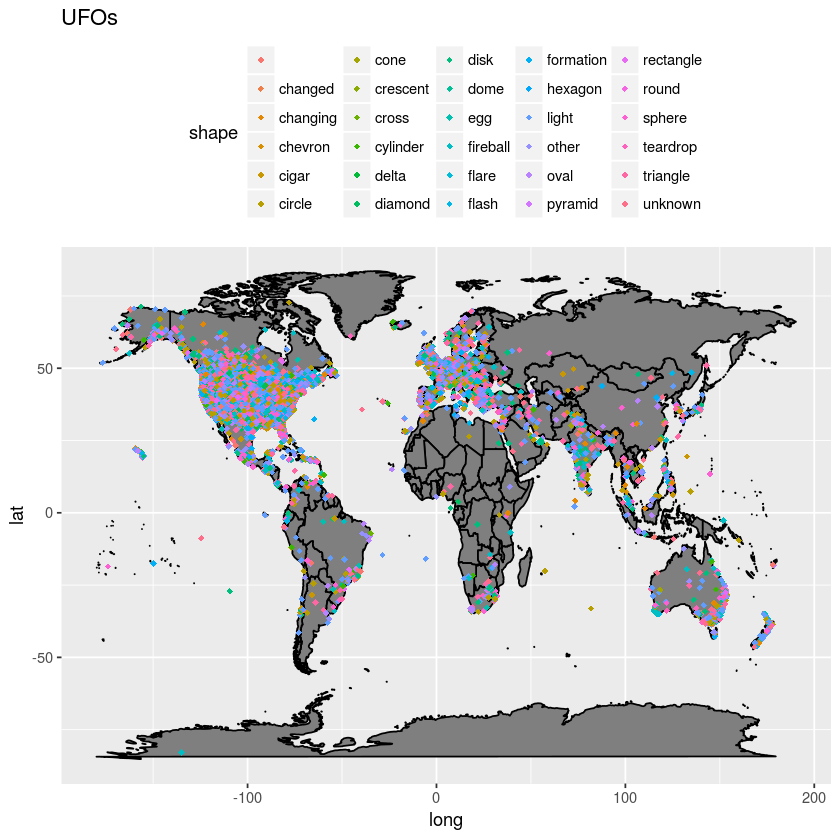

In [19]:
ufo$latitude <- as.numeric(ufo$latitude)

map <- borders("world", colour="black", fill="gray50") 
ufo_map <- ggplot(ufo) + map 
print(ufo_map + geom_point(aes(x=ufo$longitude, y=ufo$latitude,color=shape),shape=18) +
        theme(legend.position = "top")+
        ggtitle("UFOs"))

### UFOs by shape

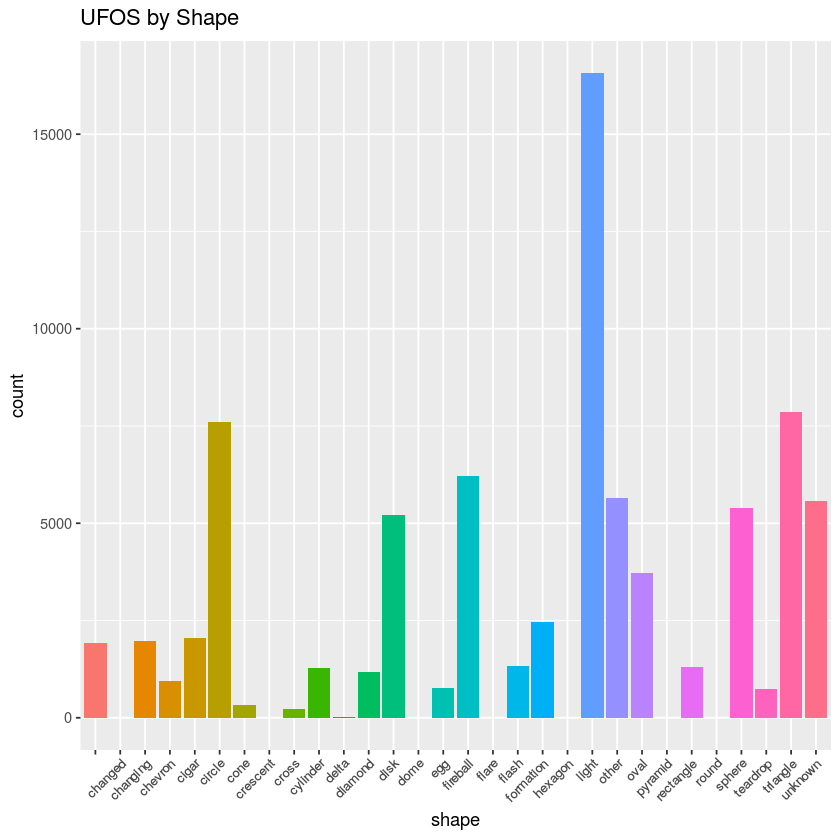

In [20]:
ggplot(ufo,aes(shape,fill=shape))+
  stat_count()+ggtitle("UFOS by Shape")+theme(legend.position="none")+
  theme(axis.text.x = element_text(angle = 45, size=8,hjust = 1))